In this demonstration we'll look at a sample example, which would be following the same procedure through which the assignment problem can be solved

In [1]:
#import all the necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

In [17]:
#Let's read the dataset first
df = pd.read_csv('https://query.data.world/s/fgpmczptzlakpvpcuuoxrotp65hsjl')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

##### We will try to cluster the data into some similar types of species

In [19]:
## Let's drop species column as this is a label column and we don't need it in case of unsupervised learning models
df.drop('species', axis = 1, inplace = True)

In [20]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
# Now, we need to create a ID columns, without this we will not be able to make necessary conclusions or we will not be able to
# identify that which observation goes to which cluster
df['ID'] = df.index+100

In [22]:
# Let's check the shape again
df.head()

,sepal_length,sepal_width,petal_length,petal_width,ID
0,5.1,3.5,1.4,0.2,100
1,4.9,3.0,1.4,0.2,101
2,4.7,3.2,1.3,0.2,102
3,4.6,3.1,1.5,0.2,103
4,5.0,3.6,1.4,0.2,104


#### The ID column will be useful while performing cluster profiling, I wanted to know which flower goes into which cluster

In [23]:
# Also, check the info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   ID            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Let's do Some EDA

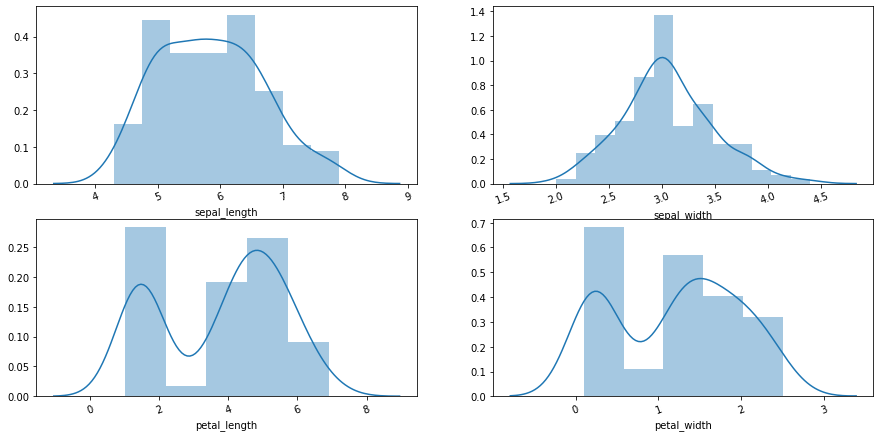

In [27]:
plt.figure(figsize=(15,15))
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in enumerate(features): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.distplot(df[i[1]])
    plt.xticks(rotation = 20)

## Question-1:

Check if the data have some null values?

In [28]:
# Number of nulls per column
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
ID              0
dtype: int64

### Let's perfrom Outlier treatment

In [29]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'ID'], dtype='object')

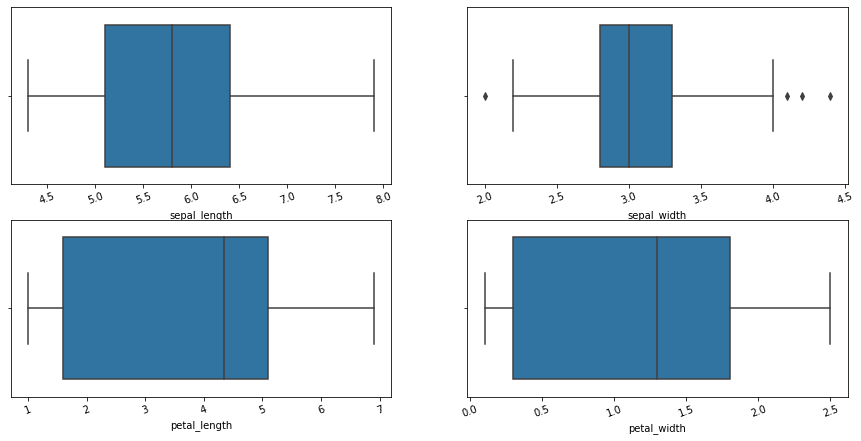

In [30]:
plt.figure(figsize=(15,15))
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in enumerate(features): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.boxplot(x=i[1], data=df)
    plt.xticks(rotation = 20)

In [31]:
Q1 = df['sepal_width'].quantile(0.01)
Q4 = df['sepal_width'].quantile(0.99)
df['sepal_width'][df['sepal_width'] <= Q1]=Q1
df['sepal_width'][df['sepal_width'] >= Q4]=Q4
df.shape

(150, 5)

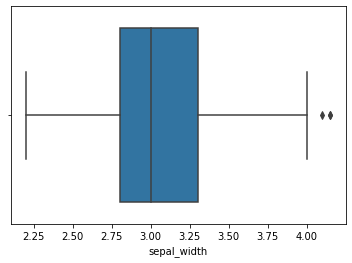

In [32]:
sns.boxplot(x='sepal_width', data=df)

## Clustering 

In [33]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

## Question 2:

Is the given data good for performing Clustering?

In [34]:
#Let's check the Hopkins measure
hopkins(df.drop('ID', axis = 1))

0.8437122293248419

In [40]:
#Answer here:

In [35]:
# Now for perfroming clustering, we need to again drop the ID column, Let's drop it
df1 = df.drop('ID', axis = 1)

In [36]:
# Check the shape of the resultant data
df1.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Scaling the data

In [37]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df1 = standard_scaler.fit_transform(df1)

In [39]:
df1 = pd.DataFrame(df1)
df1.columns = ["sepal_lenght", "sepal_width", "petal_length", "petal_width"]
df1.head()

,sepal_lenght,sepal_width,petal_length,petal_width
0,-0.900681,1.054478,-1.341272,-1.312977
1,-1.143017,-0.125943,-1.341272,-1.312977
2,-1.385353,0.346225,-1.398138,-1.312977
3,-1.506521,0.110141,-1.284407,-1.312977
4,-1.021849,1.290562,-1.341272,-1.312977


### K- means Clustering

## Question-7: Look at the silhouette score plot and choose the optimal number of cluster

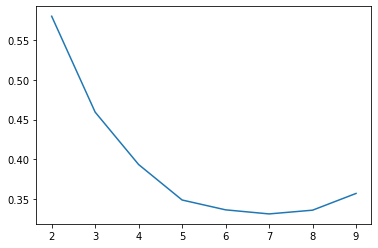

In [40]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

## Question-8: Look at the Elbow Curve plot and choose the optimal number of cluster

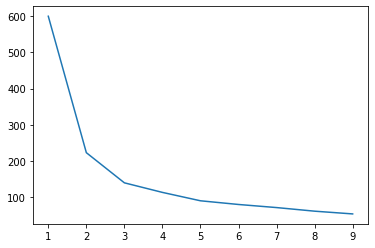

In [41]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(df1)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

## KMeans with the K the we have choosed

In [45]:
#Let's perform K means using K=3
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [44]:
## Let's make a copy of our original data before using it for analysis
df_org = df.copy()

In [47]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,ID
0,5.1,3.5,1.4,0.2,100
1,4.9,3.0,1.4,0.2,101
2,4.7,3.2,1.3,0.2,102
3,4.6,3.1,1.5,0.2,103
4,5.0,3.6,1.4,0.2,104


In [50]:
col = df.columns
col

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'ID'], dtype='object')

In [51]:
# Let's add the cluster Ids to the original data 
df_km = pd.concat([df.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
df_km.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'ID', 'cluster_id']
df_km.head()

,sepal_length,sepal_width,petal_length,petal_width,ID,cluster_id
0,5.1,3.5,1.4,0.2,100,0
1,4.9,3.0,1.4,0.2,101,0
2,4.7,3.2,1.3,0.2,102,0
3,4.6,3.1,1.5,0.2,103,0
4,5.0,3.6,1.4,0.2,104,0


In [53]:
# Cross-check
df_km.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
ID              0
cluster_id      0
dtype: int64

In [55]:
# Check the count of observation per cluster
df_km['cluster_id'].value_counts()

2    53
0    50
1    47
Name: cluster_id, dtype: int64

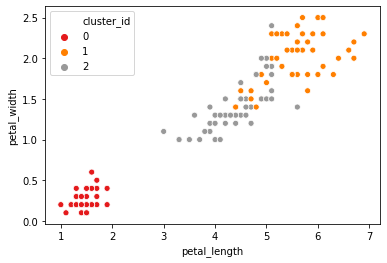

In [56]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'petal_length', y = 'petal_width', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

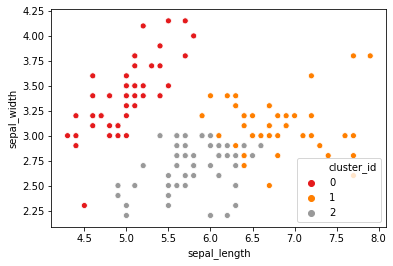

In [57]:
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

## Cluster Profiling

In [58]:
df_km.head()

,sepal_length,sepal_width,petal_length,petal_width,ID,cluster_id
0,5.1,3.5,1.4,0.2,100,0
1,4.9,3.0,1.4,0.2,101,0
2,4.7,3.2,1.3,0.2,102,0
3,4.6,3.1,1.5,0.2,103,0
4,5.0,3.6,1.4,0.2,104,0


In [59]:
df_km.drop('ID', axis = 1).groupby('cluster_id').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster_id,,,,
0,5.006000,3.412040,1.464000,0.244000
1,6.780851,3.095745,5.510638,1.972340
2,5.801887,2.677358,4.369811,1.413208


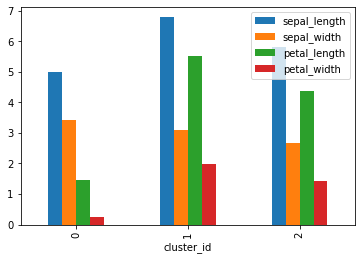

In [62]:
df_km.drop('ID', axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')

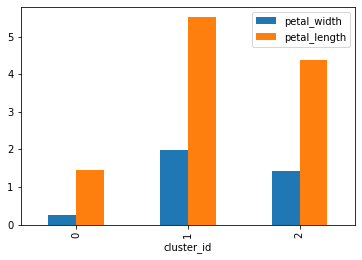

In [63]:
df_km.drop('ID', axis = 1)[['petal_width','petal_length', 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

## Finding the observations that belong to certain cluster

In [64]:
#Let's use the concept of binning
df_km[df_km['cluster_id']==0]['ID']

0     100
1     101
2     102
3     103
4     104
5     105
6     106
7     107
8     108
9     109
10    110
11    111
12    112
13    113
14    114
15    115
16    116
17    117
18    118
19    119
20    120
21    121
22    122
23    123
24    124
25    125
26    126
27    127
28    128
29    129
30    130
31    131
32    132
33    133
34    134
35    135
36    136
37    137
38    138
39    139
40    140
41    141
42    142
43    143
44    144
45    145
46    146
47    147
48    148
49    149
Name: ID, dtype: int64

In [65]:
df_km[df_km['cluster_id']==0].sort_values(by=["petal_length", 'petal_width'], ascending=[True, True]) 

,sepal_length,sepal_width,petal_length,petal_width,ID,cluster_id
22,4.6,3.600,1.0,0.2,122,0
13,4.3,3.000,1.1,0.1,113,0
14,5.8,4.000,1.2,0.2,114,0
35,5.0,3.200,1.2,0.2,135,0
2,4.7,3.200,1.3,0.2,102,0
36,5.5,3.500,1.3,0.2,136,0
38,4.4,3.000,1.3,0.2,138,0
42,4.4,3.200,1.3,0.2,142,0
40,5.0,3.500,1.3,0.3,140,0
41,4.5,2.300,1.3,0.3,141,0
